# Lab 2 -- Frequency

In our previous lab, we guided you through the understanding and generation of various signals. You've already learned about amplitude and phase, two concepts easily identifiable in the  **temporal domain**. This clarity is because a signal can be conceptualized as a 'function' over time. However, there are two crucial aspects yet to be explored: frequency $f$ and sampling rate $f_s$. These concepts are integral to "frequency" properties and play a vital role in analyzing IoT data. In this lab, we aim to:

- Explain the physical meaning of frequency,
- Demonstrate coding method to determine a signal's frequency,
- Guide you in choosing an appropriate sampling rate.

### Example 1: Pure Tone Signal

We first start with pure tone signal. As said, pure tone signal can be mathematically expressed as
$$
s(t) = A \cdot \cos(2 \pi \cdot f \cdot t + \phi).
$$
where $A$ and $\phi$ are amplitude and phase, respectively. We have explored them in the previous lab. Now we see what the frequency would make a difference. 

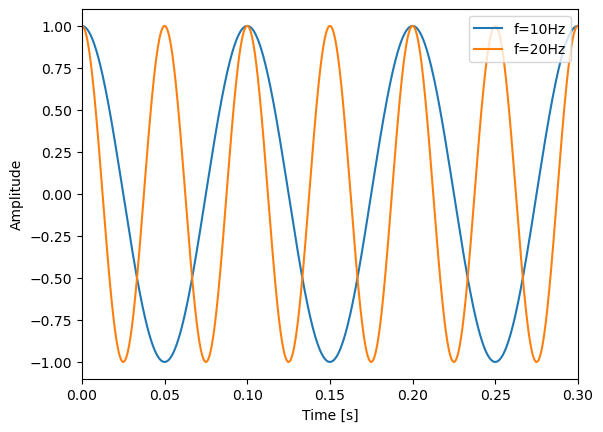

In [1]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0, 0.3, 1000) # time 
f_1 = 10 # frequency
f_2 = 20 # frequency
s_1 = np.cos(2*np.pi*f_1*t) # signal
s_2 = np.cos(2*np.pi*f_2*t) # signal
plt.plot(t, s_1)
plt.plot(t, s_2)
plt.legend([f"f={f_1}Hz", f"f={f_2}Hz"], loc="upper right")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim([0, 0.3])
plt.show()

We can see two waves are plotted, with different frequencies. For the blue line, the frequency is 10Hz, indicating the signal is repeating every 0.1s. In contrast, the orange line represents a signal with a frequency of 20Hz. A higher frequency implies a shorter period, meaning this signal completes its cycle more quickly. Specifically, at 20Hz, the signal completes one cycle every 0.05 seconds, as the period is 1/20s. This visual representation helps us understand how frequency affects the behavior of a wave. The higher the frequency, the more cycles the wave completes in a given time, leading to a 'tighter' wave pattern. Conversely, a lower frequency results in fewer cycles over the same duration, resulting in a 'looser' wave pattern.


From this simple demonstration, we gain a tangible understanding of frequency and how it reflects the repetition rate of a signal. This leads us to a pivotal question: How do we extract the frequency from the pure tone signal using programmable way?  That is, given $s(t)$ is a pure tone, how can we write a function `get_freq(s_t)` to directly get the frequency?

## Example 2: FFT of Pure Tone Signal

Obviously, for pure tone signals, the task is relatively straightforward as we can determine the frequency by measuring the intervals between peaks. Here, we introduce a more universal and robust way -- FFT (Fast Fourier Transform). 

At its core, the Fourier Transform is a mathematical technique that converts a signal from the temporal (time) domain to the frequency domain. If you're unfamiliar with the term 'domain', don't worry. We'll avoid complex mathematical definitions here. In simple terms, the temporal domain refers to representing the signal as a function of time ($t$), while the frequency domain represents the signal in terms of frequency ($f$). Again, we do not intend to involve the complex mathematical derivations here in this course. There is one thing that you should bear in mind: frequency domain shares the same information with time domain. In other word, we can use frequency domain to uncover the time domain without information loss (theorectically), and vice versa. 

Think of this transformation like telling a story in two different ways. One way is to tell the story as it unfolds over time. Alternatively, you can tell the same story by focusing on and categorizing its themes. The story remains the same; it's just interpreted differently depending on how it's presented. If the sequence of events is crucial, we use the first approach. If thematic elements are more important, we focus on the second perspective.

This analogy applies to signals as well. A signal is a physical and objective entity. To observe its variations over time, we use the temporal domain. To analyze its frequency components, which you'll find very useful, we switch to the frequency domain. Since temporal signals are more common in everyday observations, the Fourier Transform is the most convenient way to switch from the temporal to the frequency domain.



FFT (Fast Fourier Transform), as you can tell from the name, is a fast algorithm that accerlate the transformation computation on computers. Many software packages include FFT computations, such as `scipy`, `numpy`, `pytorch`, `tensorflow`, and others. Given its wide-ranging importance and applications, FFT has become an indispensable module in modern computational analysis software.

In this lab, we mainly introduce how we can utilize `scipy.fft`. Other packages have similar functions and usage, so the skills you learn here will be broadly applicable.

Text(0, 0.5, 'Magnitude (frequency domain)')

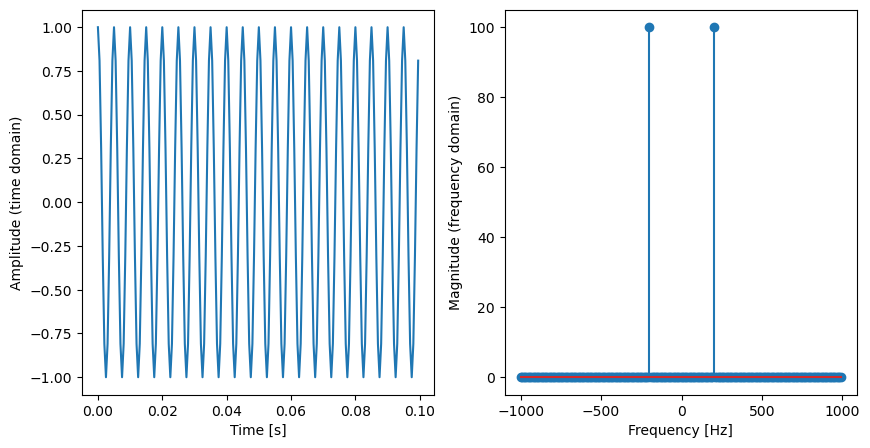

In [2]:
from scipy.fft import fft, fftfreq
import numpy as np
from matplotlib import pyplot as plt

# Generate signals
fs = 2000 # sampling frequency
t = np.arange(0, 0.1, 1/fs) # time
f_1 = 200 # frequency
s_1 = np.cos(2*np.pi*f_1*t) # signal


fft_s_1 = fft(s_1)
fft_s_1_a = np.abs(fft_s_1)
fft_f_1 = fftfreq(len(t), t[1]-t[0]) 
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(t, s_1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude (time domain)")


plt.subplot(122)
plt.stem(fft_f_1, fft_s_1_a)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude (frequency domain)")


The result of FFT is a complex signal. The magnitude of the FFT shows the contribution of each frequency component. We use `np.abs` to extract the magnitude. As you can see, the left figure is the time domain while the right figure shows the result of FFT. The x-axis of right figure is frequency. A key observation from the FFT is its symmetry, highlighted by two prominent peaks. This symmetry is characteristic of real-valued signals; essentially, the FFT output for such signals contains redundant information. The negative frequency components mirror their positive counterparts, providing no additional unique insights. To this end, in practice, we usually extract the positive frequency part as the frequency domain.

Text(0, 0.5, 'Magnitude (frequency domain)')

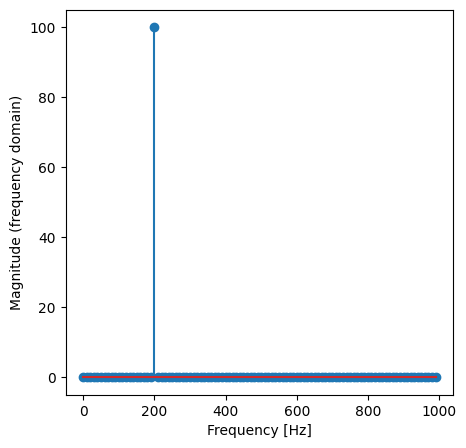

In [15]:
n_fft = len(fft_s_1_a)
fft_s = fft_s_1_a[:n_fft//2]
fft_f = fft_f_1[:n_fft//2]
plt.figure(figsize=(5, 5))
plt.stem(fft_f, fft_s)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude (frequency domain)")

Now we can see an obvious peak. To get the frequency of this peak, we can use `find_peaks` function to locate the peak and get the frequency.

In [16]:
from scipy.signal import find_peaks

x, _ = find_peaks(fft_s, threshold=10, prominence=1)
fft_f[x]

array([200.])

As you can see, we use `find_peaks` to get the index of the peak. We use the index to acquire the real frequency, which is 200Hz. You can refer to its document for more information. Until now, we attempt to utilize `scipy.fft.fft` to get the frequency list of the pure tone signal. It is quite easy, since pure tone signal only has one frequency component.  

## Example 3: Music Tone

We give a more intuitive illustration of frequency through the example of music tones. In the realm of music, frequency serves as the backbone of what we perceive as pitch. Each musical note corresponds to a specific frequency, defined by the rate at which sound waves vibrate as they travel through the air. Consider a piano: when a key is struck, it causes the strings to vibrate, producing sound waves at particular frequencies. These frequencies are what our ears interpret as distinct musical notes. For example, the note A4, commonly used as a tuning reference, vibrates at 440 Hz. As we move up the musical scale, the frequency of each note increases, leading to higher pitches. This progression is illustrated in the sequence of notes from C4 to B4, each with its own unique frequency. C4, known as middle C, vibrates at approximately 261.63 Hz. Moving up, D4 (Re) is at 293.66 Hz, E4 (Mi) at 329.63 Hz, and so on, up to B4 (Si) at 493.88 Hz. This incremental increase in frequency translates to a corresponding rise in pitch. The concept of octaves further demonstrates this relationship: as we transition from one octave to the next, such as from A3 to A4, the frequency doubles. This phenomenon creates a sense of harmonic relation despite the increase in pitch, with A3 (220 Hz) and A4 (440 Hz) sounding consonant and connected. Thus, the frequency of musical notes not only defines their pitch but also forms the basis of the harmonic structure in music.

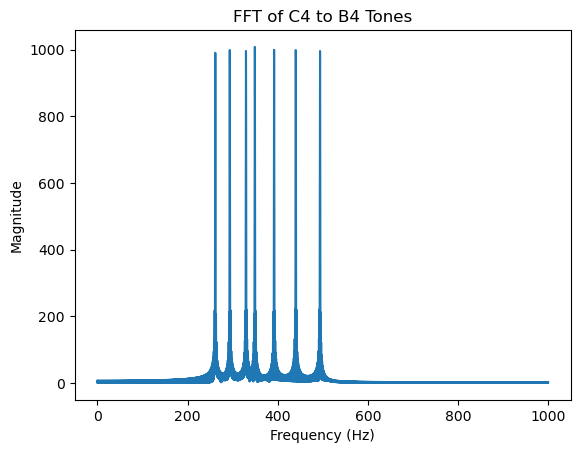

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def generate_tone(frequency, duration, fs):
    """Generate a sine wave tone for a given frequency and duration."""
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    return np.sin(2 * np.pi * frequency * t)

# Parameters
fs = 2000  # Sampling frequency (Hz)
duration = 1  # Duration of each note (seconds)

# Frequencies for C4 to b4
frequencies = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88]

# Generate tones for A1 to A7
tones = [generate_tone(f, duration, fs) for f in frequencies]

# Concatenate tones to form a signal
signal = np.concatenate(tones)

# Apply FFT to the concatenated signal
signal_fft = fft(signal)
frequencies_fft = fftfreq(len(signal), d=1/fs)

N = signal_fft.shape[0]
signal_fft = signal_fft[0:N//2]
frequencies_fft = frequencies_fft[0:N//2]

# Plot the FFT result
plt.plot(frequencies_fft, np.abs(signal_fft))
plt.title("FFT of C4 to B4 Tones")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
# plt.xlim(0, 4000)  # Adjust the x-axis range as needed
plt.show()

In [18]:
from IPython.display import Audio
Audio(np.squeeze(signal), rate=fs)

For pure tone signals, the task is relatively straightforward as we can determine the frequency by measuring the intervals between peaks. However, in the real world, signals are often not pure tones and may even be aperiodic. Yet, intuitively, we know that these complicated signals also embody frequency characteristics. The challenge, therefore, lies in uncovering the frequencies within these more intricate and varied signals.

## Example 4: FFT of Pulse Signal

First considering a periodic pulse signal, defined as below:
\begin{equation*}
\hat{s(t)} \equiv p_\tau(t)= \begin{cases}0 & \text { for }-\tau_0 / 2<t<-\tau / 2 \\ 1 & \text { for }-\tau / 2 \leq t \leq \tau / 2 \\ 0 & \text { for } \tau / 2<t \leq \tau_0 / 2\end{cases},
\end{equation*}
Here we let $\tau_0=4s$ and $\tau=2s$.

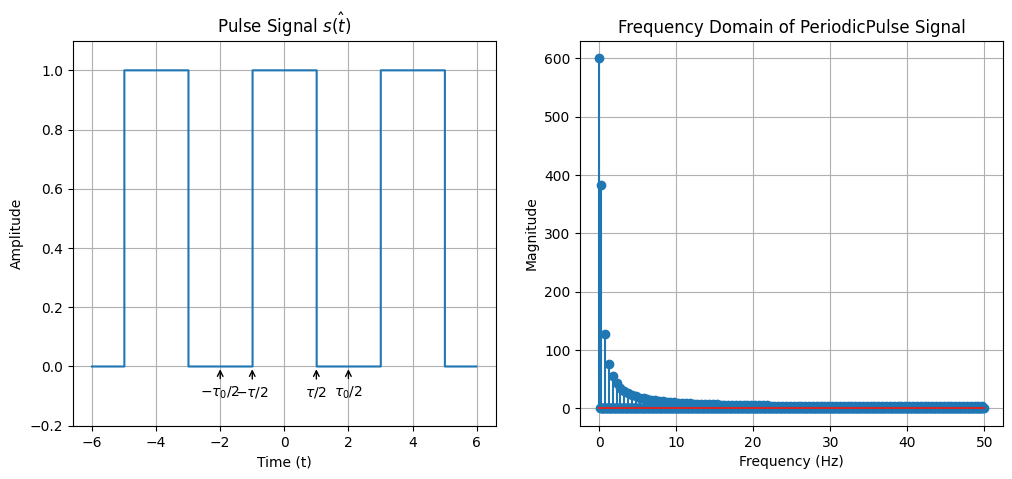

In [19]:
# Set parameters for the pulse signal
tau = 2.0 # Pulse width
tau_0 = 4.0  # Total period of the signal

fs = 100  # Sampling frequency
t = np.arange(-1.5 * tau_0, 1.5 * tau_0, 1/fs)  # Time vector

def p_tau(t, tau, tau_0):
    """
    Defines the pulse signal p_tau(t). 
    It will repeat every tau_0 seconds.

    Parameters:
    t (numpy array): Time array.
    tau (float): Pulse width.
    tau_0 (float): Total period of the signal.

    Returns:
    numpy array: The pulse signal values.
    """
    period = np.floor((t + tau_0 / 2) / tau_0) * tau_0
    t_adjusted = t - period
    return np.where(np.abs(t_adjusted) < tau / 2, 1, 0)

s_t = p_tau(t, tau, tau_0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, s_t, label="$\hat{s(t)}$",drawstyle='steps-post')
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Pulse Signal $\hat{s(t)}$")
plt.annotate('$-\\tau_0/2$', xy=(-tau_0/2, 0), xytext=(-tau_0/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('$-\\tau/2$', xy=(-tau/2, 0), xytext=(-tau/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('$\\tau/2$', xy=(tau/2, 0), xytext=(tau/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('$\\tau_0/2$', xy=(tau_0/2, 0), xytext=(tau_0/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.ylim(-0.2, 1.1)
plt.grid(True)


s_f = fft(s_t)
s_f_len = len(s_f)
s_f_freq = fftfreq(s_f_len, d=1/fs)
s_f = s_f[0:s_f_len//2]
s_f_freq = s_f_freq[0:s_f_len//2]
s_f = np.abs(s_f)
plt.subplot(1, 2, 2)
plt.stem(s_f_freq, s_f, label="$S(f)$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain of PeriodicPulse Signal")
plt.grid(True)

Peaks at [0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75 6.25 6.75
 7.25 7.75] Hz


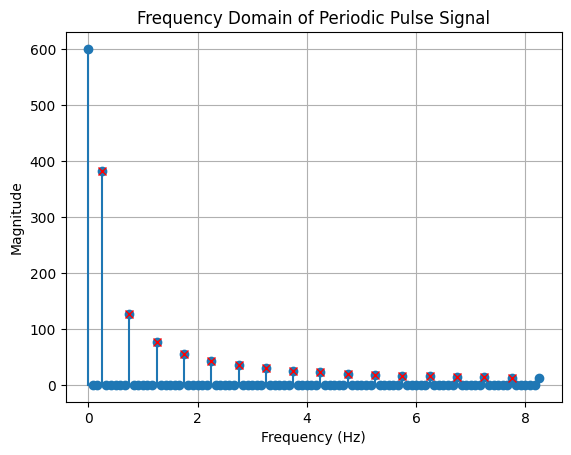

In [20]:
from scipy.signal import find_peaks
s_f_100, s_f_freq_100 = s_f[:100], s_f_freq[:100]
x_peaks, _ = find_peaks(s_f_100, threshold=0.5, prominence=0.1)

plt.stem(s_f_freq_100, s_f_100, linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='$S(f)$')
plt.plot(s_f_freq_100[x_peaks], s_f_100[x_peaks], 'x', label="Peaks", color="red")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain of Periodic Pulse Signal")
plt.grid(True)

print(f"Peaks at {s_f_freq_100[x_peaks]} Hz")

We can see the first peak represents 0.25Hz, which is the period of the periodic pulse wave. And the remaining are the harmonics. These are all **frequency components** of $s(t)$. The key idea of Fourier Transform is to turn every signal as an aggregation of pure tones with different amplitudes, phase and frequencies. Essentially, the Fourier Transform seeks to approximate the original signal function as a sum of sinusoidal waves, akin to how the Taylor Expansion represents a function as a sum of polynomials.  Frequency is not confined solely to periodic signals with repeating cycles; in fact, any physical signal possessing finite energy can be decomposed into a series of pure tones. These tones differ in their amplitudes, phases, and frequencies. The frequencies of these pure tones constitute the frequency components of the original signal. In other word, we can apply FFT on **both periodic and non-periodic** signals.

Now we consider a non-periodic pulse wave.

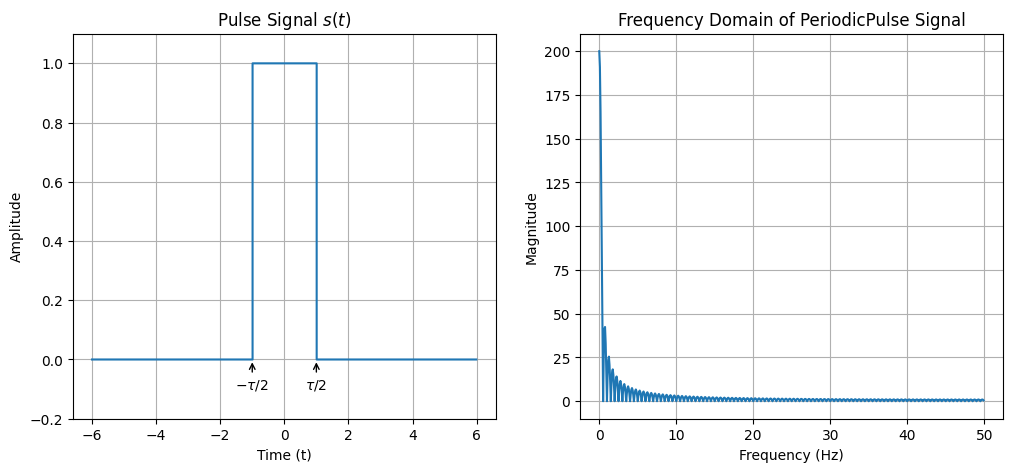

In [21]:
# Set parameters for the pulse signal
tau = 2.0 # Pulse width

fs = 100  # Sampling frequency
t = np.arange(-6, 6, 1/fs)  # Time vector

def p_tau(t, tau):
    """
    Defines the pulse signal p_tau(t). 

    Parameters:
    t (numpy array): Time array.
    tau (float): Pulse width.

    Returns:
    numpy array: The pulse signal values.
    """
    return np.where(np.abs(t) < tau / 2, 1, 0)

s_t = p_tau(t, tau)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, s_t, label="${s(t)}$",drawstyle='steps-post')
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Pulse Signal ${s(t)}$")
plt.annotate('$-\\tau/2$', xy=(-tau/2, 0), xytext=(-tau/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('$\\tau/2$', xy=(tau/2, 0), xytext=(tau/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.ylim(-0.2, 1.1)
plt.grid(True)


s_f = fft(s_t)
s_f_len = len(s_f)
s_f_freq = fftfreq(s_f_len, d=1/fs)
s_f = s_f[0:s_f_len//2]
s_f_freq = s_f_freq[0:s_f_len//2]
s_f = np.abs(s_f)
plt.subplot(1, 2, 2)
plt.plot(s_f_freq, s_f, label="$S(f)$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain of PeriodicPulse Signal")
plt.grid(True)

Peaks at [0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75 6.25 6.75 7.25
 7.75] Hz


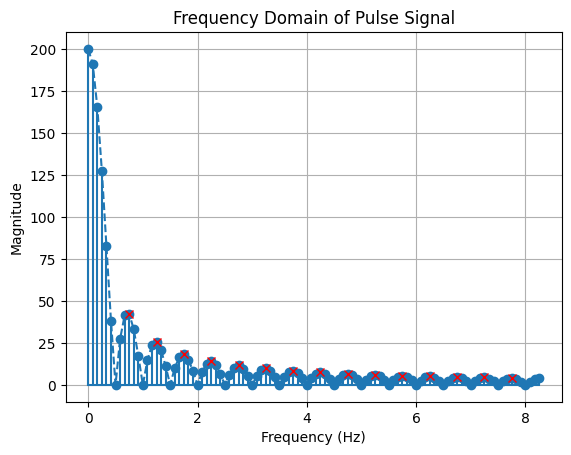

In [22]:
from scipy.signal import find_peaks
s_f_100, s_f_freq_100 = s_f[:100], s_f_freq[:100]
x_peaks, _ = find_peaks(s_f_100, threshold=0.5, prominence=0.1)

plt.stem(s_f_freq_100, s_f_100, linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='$S(f)$')
plt.plot(s_f_freq_100, s_f_100, "--")
plt.plot(s_f_freq_100[x_peaks], s_f_100[x_peaks], 'x', label="Peaks", color="red")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain of Pulse Signal")
plt.grid(True)

print(f"Peaks at {s_f_freq_100[x_peaks]} Hz")

Compared to previous periodic pulse signal, we can tell from the frequency components that they are the same as that of periodic signal, excluding the period.  Notably, the frequency spectrum of the non-periodic signal appears denser Actually, the FFT of non-periodic signal will result is continous frequency spectrum. Conversely, the FFtT of periodic signal leads to discrete frequency spectrum. These are two interesting dualities.

By now, I hope you have learned how to use `scipy.fft.fft` for frequency analysis. The process begins with performing an FFT on the time-domain signals. After obtaining the FFT results, we typically consider only half of the output, as it contains the useful information we need. The other half is usually symmetric and redundant for our purposes. In most of our labs and tasks going forward, unless specified otherwise, we will refer to the magnitude of the FFT output as the frequency spectrum. Below, we will discuss some parameters that will affect the result of FFT.

## Example 5: Sampling

Previously we set up the sampling rate `fs`($f_s$) for you, as well as the duration $T$. Given these two parameters, we can acquire the number of samples $N$:
$$
N = T \cdot f_s.
$$

This is vital, since it bridges a continous variable $T$ with a discrete $N$. As discussed in Lab 1, signals can be classified into analog and digital types. In the realm of computing, we predominantly process digital signals. The transformation of an analog signal into a digital one typically involves an essential process known as sampling. There are several methods for sampling, but in this course, we focus on the simplest form: even sampling.  The sampling rate `fs` refers to how many samples we acquire in one second. Intuitively, to capture higher frequency components in a signal, a higher sampling rate is required. Consider the analogy of using a camera to capture images of a spinning wheel: if the sampling rate is too low, it becomes challenging to observe the wheel's rotation. Consequently, there should be a **minimum threshold** for the sampling rate that can fully capture the signal's frequency range. This is where the Nyquist theorem comes into play. It states that the sampling rate should be at least **twice** the highest frequency component in the signal to accurately capture all the information (avoid aliasing),
$$
f_s \ge 2 \cdot f_{\max}.
$$

This concept is also evident in the FFT spectrum. By definition, the FFT spectrum repeats at every $f_s$.  Therefore, the output of `scipy.fft.fftfreq` typically displays a frequency range from $[0, f_s]$. As discussed above, only half of the FFT spectrum contains useful information, limiting the useful frequency band to $[0, \dfrac{f_s}{2}]$ Hz. Thus, to ensure accurate representation, it must be larger than twice the largest frequency component $f_{\max}$. We will demonstrate this through practical coding examples.


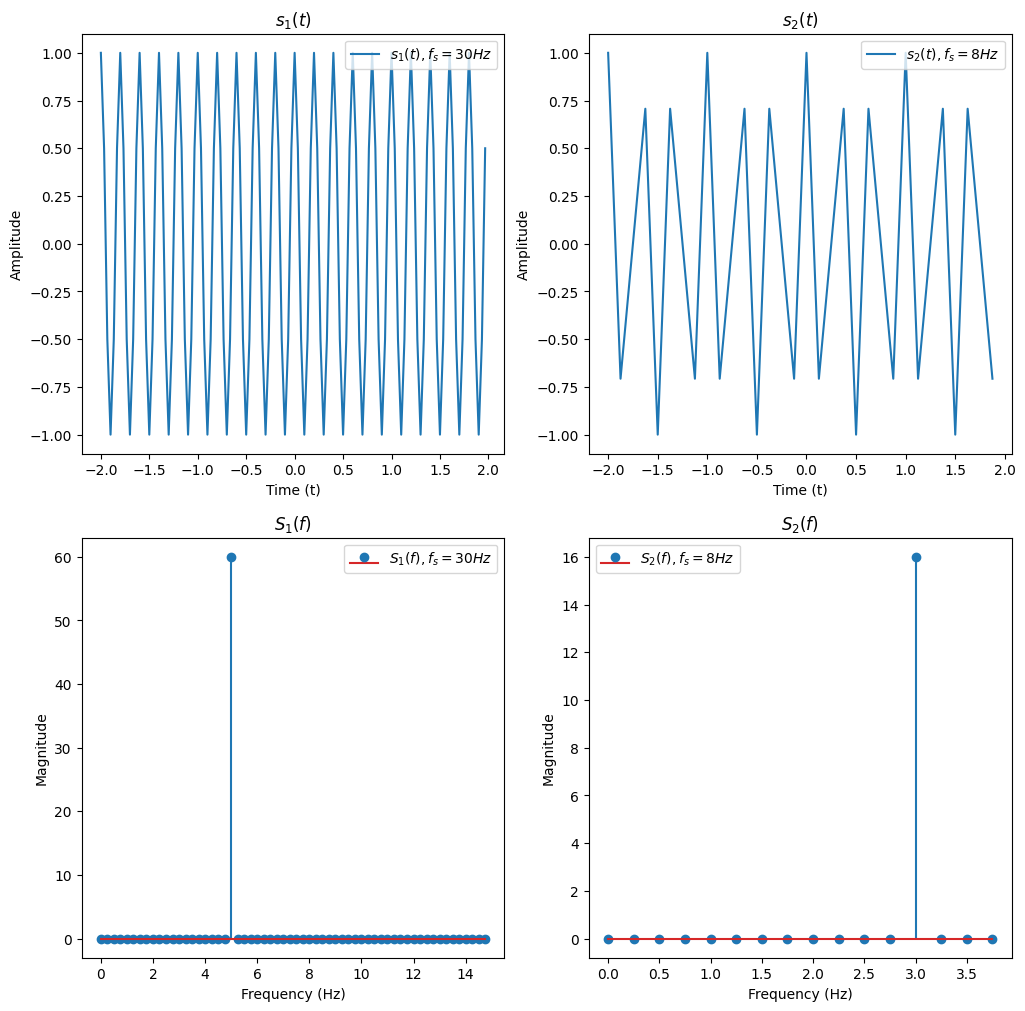

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


fs_1 = 30  # Sampling frequency
fs_2 = 8

f = 5

t_1 = np.arange(-2, 2, 1/fs_1)  # Time vector
t_2 = np.arange(-2, 2, 1/fs_2)  # Time vector

s_t_1 = np.cos(2*np.pi*f*t_1)
s_t_2 = np.cos(2*np.pi*f*t_2)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot(t_1, s_t_1, label=f"$s_1(t), f_s={fs_1}Hz$")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("$s_1(t)$")
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(t_2, s_t_2, label=f"$s_2(t), f_s={fs_2}Hz$")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("$s_2(t)$")
plt.legend(loc="upper right")

s_f_1 = fft(s_t_1)
s_f_1_len = len(s_f_1)
s_f_1_freq = fftfreq(s_f_1_len, d=1/fs_1)
s_f_1 = s_f_1[0:s_f_1_len//2]
s_f_1_freq = s_f_1_freq[0:s_f_1_len//2]
s_f_1 = np.abs(s_f_1)

s_f_2 = fft(s_t_2)
s_f_2_len = len(s_f_2)
s_f_2_freq = fftfreq(s_f_2_len, d=1/fs_2)
s_f_2 = s_f_2[0:s_f_2_len//2]
s_f_2_freq = s_f_2_freq[0:s_f_2_len//2]
s_f_2 = np.abs(s_f_2)

plt.subplot(2, 2, 3)
plt.stem(s_f_1_freq, s_f_1, label=f"$S_1(f), f_s={fs_1}Hz$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("$S_1(f)$")
plt.legend(loc="upper right")

plt.subplot(2, 2, 4)
plt.stem(s_f_2_freq, s_f_2, label=f"$S_2(f), f_s={fs_2}Hz$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("$S_2(f)$")
plt.legend(loc="upper left")


As shown above, we plot two signal of the same frequency $f=5$ with different sampling frequencies. The left part ($s_1(t)$ and $S_1(f)$) is sampled at 30Hz. This sampling rate is greater than twice the maximum frequency present in the signal (which, in this case, has only one frequency component). As a result, both the temporal and frequency domains are well-represented. The frequency of 5 Hz is clearly observable in $S_1(f)$. 

Conversely, the right part ($s_2(t)$ and $S_2(f)$) is sampled at 8Hz. This rate is insufficient for the given signal frequency, leading to aliasing, which manifests as a distortion in the temporal signal. Moreover, the frequency displayed in the FFT is incorrect due to this under-sampling. And the frequency shown on FFT is not right (You can think about why this frequency occurs.). This example effectively demonstrates how the choice of sampling rate can significantly impact signal representation in both the time and frequency domains.

Alternatively, the sampling rate can be seen as the reciprocal of temporal *resolution* of the signal. The resolution means we can distinguish clearly between two samples, which is
$$
\Delta t = \frac{1}{f_s}.
$$
For example, if $f_s=10$Hz, it means 10 samples is generated within one second. The time difference between these samples is $1/10=0.1$s. In some textbook, you may encounter a word "bin" to denote the interval. We can say the time bin of the signal is 0.1s. At the same time, the FFT spectrum is also discrete. How can we calculate the frequency resolution (frequency resolution)? The total length of the computed FFT is $\dfrac{N_{\text{FFT}}}{2}$, and there are overall $\dfrac{f_s}{2}$ frequencies (whether divide 2 does not matter here). Therefore, the distance between adjancent frequency is 
$$
\Delta f_{\text{FFT}} = \frac{f_s}{N_{\text{FFT}}},
$$
which is the frequency resolution. Note that $N_{\text{FFT}}$ is the length of the FFT. It can be different from the length of the signal. Sometimes we may empirically set $N$ to the closest number that is power of 2, which is best for FFT algorithm. If we use the FFT length $N_{\text{FFT}} > N$, where $N$ is the length of the signal, 0s will be padding after the original signal to meet the desired length. We call this operartion as zero padding. Note that though zero padding can create more points in the FFT spectrum, thus making more fine-grained resolution on the FFT graph, it does not make a real difference! Here, to avoid confusion, we denote the above frequency resolution $\Delta f_{\text{FFT}}$ as "FFT resolution". Zero padding in the temporal domain will result in interpolation in the frequency domain. While zero padding can refine the FFT resolution and make the frequency spectrum appear more detailed, it does not increase the ability to distinguish new frequencies. This ability is physically restrained by the "real frequency resolution", which is
$$
\Delta f = \frac{f_s}{N} = \frac{1}{T},
$$
where $N$ is the length of the signal. In other word, the ability to distinguish adjacent frequency is limited by both sampling rate $f_s$, and signal length $N$. If this result cannot do, then zero padding can not do either. For example, if $fs/N = 2$, that means the minimum frequency difference it can tell from the FFt graph is 2Hz. It is definitely unable to analyze a signal with frequency 10Hz and 11Hz. 

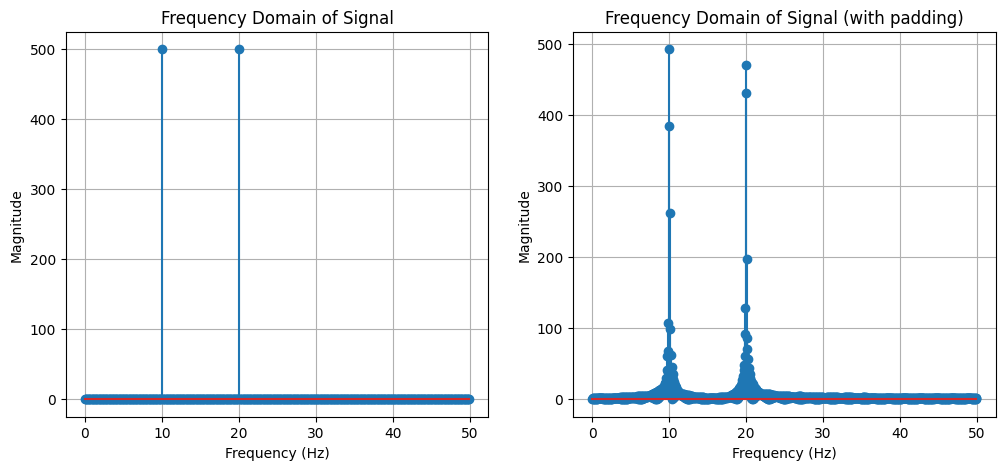

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


fs = 100
N = 1000
t = np.arange(0, N/fs, 1/fs)  # Time vector
f_1 = 10
f_2 = 20
s_t = np.cos(2*np.pi*f_1*t) + np.cos(2*np.pi*f_2*t)

s_f = fft(s_t)
s_f_len = len(s_f)
s_f_freq = fftfreq(s_f_len, d=1/fs)
s_f = s_f[0:s_f_len//2]
s_f_freq = s_f_freq[0:s_f_len//2]
s_f = np.abs(s_f)

s_f_pad = fft(s_t, n=2048) # padding to 2048 points
s_f_pad_len = len(s_f_pad)
s_f_pad_freq = fftfreq(s_f_pad_len, d=1/fs)
s_f_pad = s_f_pad[0:s_f_pad_len//2]
s_f_pad_freq = s_f_pad_freq[0:s_f_pad_len//2]
s_f_pad = np.abs(s_f_pad)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem(s_f_freq, s_f, label="$S(f)$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain of Signal")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(s_f_pad_freq, s_f_pad, label="$S(f)$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain of Signal (with padding)")
plt.grid(True)

As you can see, no matter whether we pad zeros, it makes no difference to distinguish the two frequencies 10Hz and 11Hz. 

In summary, the choice of sampling rate is critical in accurately capturing and analyzing a signal's frequency components. It influences the temporal and frequency resolution, affecting both the time-domain representation and the FFT spectrum. Understanding these principles is key in signal processing, especially when interpreting FFT results and considering the effects of sampling and zero padding on frequency analysis.

## Programming task

Please refer to `lab_2_2025.pdf` for more details.

After implementing the tasks, **please run `python check.py --uid <YOUR_UID>` before submitting.** This script performs automated tests on the examples provided in the docstrings. Failing these tests indicates potential critical issues in your code. Strive to resolve these problems. After that, it will create a zip file named after your `uid`. Make sure you enter the right `uid`. 

It's important to avoid changing the names of any files, including both the zip file and the program files contained within. Altering file names can lead to grading errors. Ensure that all file names remain as they are to facilitate accurate assessment of your work.

Your submission to **Moodle** should consist solely of the **generated `*.zip` file**. It is your responsibility to double check whether your submitted zip file includes your latest work. 